In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("D:\\ML_SPAM-DETECTION PROJECT\\Dataset\\spam.csv", encoding="ISO-8859-1")

In [6]:
df.keys()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
 df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
 df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
 df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [12]:
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [13]:
df =df.where((pd.notnull(df)),'')

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.shape

(5572, 2)

In [16]:
df.loc[df['v1']=='spam','v1',]=0
df.loc[df['v1']=='ham','v1',] = 1

In [17]:
x = df['v2']
y = df['v1']


In [18]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [19]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 3)

In [21]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [22]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


In [23]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [24]:
 print(x_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


In [25]:
print(x_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34758 stored elements and shape (4457, 7510)>
  Coords	Values
  (0, 4513)	0.2909649098524696
  (0, 3380)	0.21807195185332803
  (0, 3262)	0.25877035357606315
  (0, 3136)	0.440116181574609
  (0, 2122)	0.38613577623520473
  (0, 3386)	0.3219352588930141
  (0, 6599)	0.20296878731699391
  (0, 4296)	0.3891385935794867
  (0, 3979)	0.2410582143632299
  (0, 741)	0.3219352588930141
  (1, 7443)	0.35056971070320353
  (1, 6442)	0.5652509076654626
  (1, 6417)	0.4769136859540388
  (1, 6872)	0.4306015894277422
  (1, 4061)	0.380431198316959
  (2, 5825)	0.4917598465723273
  (2, 2226)	0.413484525934624
  (2, 3917)	0.40088501350982736
  (2, 2109)	0.42972812260098503
  (2, 933)	0.4917598465723273
  (3, 7453)	0.5202633571003087
  (3, 1842)	0.3708680641487708
  (3, 1599)	0.5927091854194291
  (3, 6140)	0.4903863168693604
  (4, 1842)	0.36051481797205776
  :	:
  (4452, 4636)	0.4030918768627523
  (4453, 1762)	0.45610005640082985
  (4453, 7273)	0.578773

In [26]:
print(x_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


In [27]:
print(x_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7766 stored elements and shape (1115, 7510)>
  Coords	Values
  (0, 1537)	0.667337188824809
  (0, 4294)	0.5159375448718375
  (0, 6007)	0.537093591660729
  (1, 1)	0.21260233518669944
  (1, 43)	0.24547458936715755
  (1, 321)	0.28671640581392144
  (1, 520)	0.1934450786526249
  (1, 602)	0.28671640581392144
  (1, 2899)	0.1385795841356552
  (1, 3300)	0.37297727661877506
  (1, 3365)	0.28671640581392144
  (1, 4045)	0.250549335510249
  (1, 5250)	0.28671640581392144
  (1, 5347)	0.2733682162643466
  (1, 5501)	0.28671640581392144
  (1, 6579)	0.2733682162643466
  (1, 6599)	0.14954692788663673
  (1, 7222)	0.23059492898537964
  (2, 2939)	0.47195476517479323
  (2, 2941)	0.6068486133983123
  (2, 4070)	0.44361668503137164
  (2, 6648)	0.3410121739015846
  (2, 6701)	0.30969080396105314
  (3, 1606)	0.28517759021090444
  (3, 2649)	0.303870736800912
  :	:
  (1111, 2458)	0.42325261089251354
  (1111, 3259)	0.44776220819286267
  (1111, 6093)	0.4671914

In [28]:
print(x_test)

2632                       I WILL CAL YOU SIR. In meeting
454     Loan for any purpose å£500 - å£75,000. Homeown...
983     LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
1282    Ever green quote ever told by Jerry in cartoon...
4610                                  Wat time Ì_ finish?
                              ...                        
4827    Lol no. Just trying to make your day a little ...
5291      Xy trying smth now. U eat already? We havent...
3325    Huh so fast... Dat means u havent finished pai...
3561    Still chance there. If you search hard you wil...
1136    Dont forget you can place as many FREE Request...
Name: v2, Length: 1115, dtype: object


In [29]:
print(y_train)

3075    1
1787    1
1614    1
4304    1
3266    1
       ..
789     1
968     1
1667    1
3321    1
1688    1
Name: v1, Length: 4457, dtype: int32


In [30]:
print(y_test)

2632    1
454     0
983     1
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    0
Name: v1, Length: 1115, dtype: int32


In [31]:
model= LogisticRegression()

In [32]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [33]:
import joblib

# Train your model
model.fit(x_train_features, y_train)

# Save the trained model
joblib.dump(model, "spam_detection_model.pkl")

print("Model saved successfully!")

# Save the trained vectorizer
joblib.dump(feature_extraction, "vectorizer.pkl")

print("Vectorizer saved successfully")

Model saved successfully!
Vectorizer saved successfully


In [34]:
prediction = model.predict(x_train_features)
accuracy = accuracy_score(y_train, prediction)

In [35]:
print("Accuracy on Training data :", accuracy)

Accuracy on Training data : 0.9661207089970832


In [36]:
prediction_test = model.predict(x_test_features)
accuracy_test = accuracy_score(y_test, prediction_test)

In [37]:
 print("Accuracy on Testing data :", accuracy_test)

Accuracy on Testing data : 0.9623318385650225


In [38]:
predictions = model.predict(x_test_features)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.84       155
           1       0.96      1.00      0.98       960

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



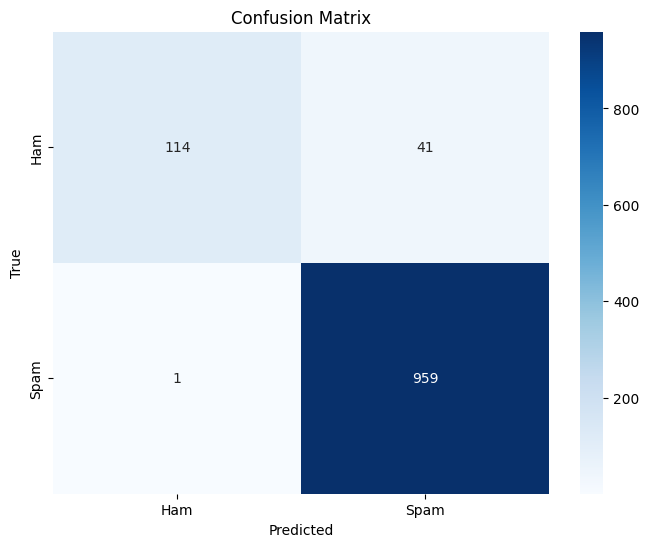

In [39]:
predictions = model.predict(x_test_features)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
input_your_mail = ['Looking to build a career driven by learning and fueled by an inclusive culture? Grab this unique opportunity to jumpstart your career as an intern with us.Our Summer Internship Program is open for students who are graduating in 2026 from all streams of B.E/B.Tech/M.E/M.Tech, MCA and M.Sc.(CS/IT/Computer Applications/ Data Science/ Computer Science & Applications). ']
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
if (prediction[0]==1):
    print("Ham mail")
else:
    print("Spam mail")

Ham mail


In [42]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the trained model and vectorizer
model = joblib.load("spam_detection_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

def predict_spam():
    """Predict whether the entered message is spam or not."""
    message = entry.get("1.0", tk.END).strip()
    if not message:
        messagebox.showwarning("Warning", "Please enter a message!")
        return

    # Transform input using the vectorizer
    message_vectorized = vectorizer.transform([message])

    # Predict
    prediction = model.predict(message_vectorized)[0]

    # Show Result
    if prediction == 1:
        result_label.config(text="✅ Ham Mail", fg="green")
    else:
        result_label.config(text="🚨 Spam Mail", fg="red")

# Tkinter GUI setup
root = tk.Tk()
root.title("Spam Detection App")
root.geometry("500x350")

# Heading
tk.Label(root, text="Spam Detection System", font=("Arial", 14, "bold")).pack(pady=10)

# Input box
entry = tk.Text(root, height=6, width=50)
entry.pack(pady=5)

# Predict button
predict_button = tk.Button(root, text="Check Message", command=predict_spam, font=("Arial", 12), bg="blue", fg="white")
predict_button.pack(pady=10)

# Result label
result_label = tk.Label(root, text="", font=("Arial", 14, "bold"))
result_label.pack(pady=10)

# Run Tkinter loop
root.mainloop()
